# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


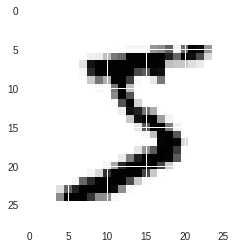

In [3]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [8]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [14]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 5,1, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 1,5, activation='relu'))
# model.add(Dropout(0.7))
model.add(MaxPooling2D(pool_size=2, strides=None, padding='valid'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(10, 10))
# model.add(Convolution2D(10, 1, activation='relu'))
# model.add(Convolution2D(10, 24))
# model.add(MaxPooling2D(pool_size=2, strides=None, padding='valid'))
# model.add(Convolution2D(10, 1, activation='relu'))
# model.add(Convolution2D(10, 9, activation='relu'))
# model.add(Convolution2D(32, 3, activation='relu'))
# model.add(Convolution2D(32, 5, activation='relu'))
# model.add(Convolution2D(10, 19, activation='relu'))
# model.add(MaxPooling2D(pool_size=2, strides=None, padding='valid'))
# model.add(Convolution2D(10, 1, activation='relu'))
# model.add(Convolution2D(32, 2, 2, activation='relu'))
# model.add(Convolution2D(32, 2, 2, activation='relu'))
# model.add(Convolution2D(10, 1, activation='relu'))
# model.add(Convolution2D(10, 10, activation='relu'))
# # model.add(Convolution2D(10, 3,3))
# # model.add(Convolution2D(10, 11,11, activation='relu'))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 1), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 5), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 24, 28, 32)        192       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 32)        5152      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 1, 1, 10)          32010     
_________________________________________________________________
flatten_2 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total para

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [17]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 23s 380us/step - loss: 0.1465 - acc: 0.9554
Epoch 2/10
50944/60000 [========================>.....] - ETA: 3s - loss: 0.0509 - acc: 0.985060000/60000 [==============================] - 21s 344us/step - loss: 0.0491 - acc: 0.9851
Epoch 3/10
60000/60000 [==============================] - 21s 347us/step - loss: 0.0348 - acc: 0.9890
Epoch 4/10
13056/60000 [=====>........................] - ETA: 16s - loss: 0.0229 - acc: 0.992860000/60000 [==============================] - 21s 345us/step - loss: 0.0256 - acc: 0.9919
Epoch 5/10
60000/60000 [==============================] - 20s 342us/step - loss: 0.0204 - acc: 0.9932
Epoch 6/10
 2048/60000 [>.............................] - ETA: 20s - loss: 0.0086 - acc: 0.997160000/60000 [==============================] - 21s 342us/step - loss: 0.0158 - acc: 0.9953
Epoch 7/10
58976/60000 [============================>.] - ETA: 0s - loss: 0.0124 - acc: 0.996360000/60000 [==============================

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [19]:
print(score)

[0.03862601956458843, 0.9916]


In [0]:
y_pred = model.predict(X_test)

In [21]:
print(y_pred[:9])
print(y_test[:9])

[[1.6766694e-19 2.4293749e-23 3.0154017e-15 3.3653812e-11 1.6824322e-23
  9.0364089e-18 8.2460712e-31 1.0000000e+00 2.7956351e-18 1.5539864e-13]
 [2.1175965e-16 8.7530441e-18 1.0000000e+00 3.7259122e-22 9.3698532e-26
  8.5974933e-29 1.4114961e-15 2.8623161e-24 7.7001959e-20 1.3076943e-21]
 [1.1459237e-11 9.9999762e-01 9.3107960e-10 1.0585906e-10 1.7662133e-07
  1.1981100e-08 6.7403488e-10 1.7797121e-06 3.9206162e-07 2.1283518e-11]
 [9.9999976e-01 5.2022729e-18 6.4555056e-10 1.6351479e-15 8.4766558e-14
  1.4844793e-13 1.8069882e-07 2.6000471e-12 4.5274504e-10 8.4324281e-09]
 [6.2784036e-16 8.6798642e-17 1.4563554e-14 8.8526510e-16 1.0000000e+00
  1.4550795e-16 5.3067024e-14 6.0328484e-13 2.7289279e-10 3.8328860e-08]
 [1.3903134e-12 9.9999130e-01 6.9174377e-10 4.0553008e-12 8.6209099e-08
  4.8363737e-11 1.2644228e-12 6.7650171e-06 1.9244071e-06 4.4529869e-11]
 [1.3140152e-28 1.5243668e-19 5.7061122e-17 6.3732687e-21 9.9999988e-01
  6.6687357e-15 4.0213277e-24 2.0031264e-16 1.0195425e-07 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
# import numpy as np
# from matplotlib import pyplot as plt
# from keras import backend as K
# %matplotlib inline
# # util function to convert a tensor into a valid image
# def deprocess_image(x):
#     # normalize tensor: center on 0., ensure std is 0.1
#     x -= x.mean()
#     x /= (x.std() + 1e-5)
#     x *= 0.1

#     # clip to [0, 1]
#     x += 0.5
#     x = np.clip(x, 0, 1)

#     # convert to RGB array
#     x *= 255
#     #x = x.transpose((1, 2, 0))
#     x = np.clip(x, 0, 255).astype('uint8')
#     return x

# def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
#                       layer_name = 'conv2d_14'):
#     layer_output = layer_dict[layer_name].output
#     img_ascs = list()
#     for filter_index in range(layer_output.shape[3]):
#         # build a loss function that maximizes the activation
#         # of the nth filter of the layer considered
#         loss = K.mean(layer_output[:, :, :, filter_index])

#         # compute the gradient of the input picture wrt this loss
#         grads = K.gradients(loss, model.input)[0]

#         # normalization trick: we normalize the gradient
#         grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

#         # this function returns the loss and grads given the input picture
#         iterate = K.function([model.input], [loss, grads])

#         # step size for gradient ascent
#         step = 5.

#         img_asc = np.array(img)
#         # run gradient ascent for 20 steps
#         for i in range(20):
#             loss_value, grads_value = iterate([img_asc])
#             img_asc += grads_value * step

#         img_asc = img_asc[0]
#         img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
#     if layer_output.shape[3] >= 35:
#         plot_x, plot_y = 6, 6
#     elif layer_output.shape[3] >= 23:
#         plot_x, plot_y = 4, 6
#     elif layer_output.shape[3] >= 11:
#         plot_x, plot_y = 2, 6
#     else:
#         plot_x, plot_y = 1, 2
#     fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
#     ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
#     ax[0, 0].set_title('Input image')
#     fig.suptitle('Input image and %s filters' % (layer_name,))
#     fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
#     for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
#         if x == 0 and y == 0:
#             continue
#         ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
#         ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

# vis_img_in_filter()